In [1]:
import  os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers, optimizers, datasets, Sequential
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## Label	Description
0	airplane
1	automobile
2	bird
3	cat
4	deer
5	dog
6	frog
7	horse
8	ship
9	*truck*

array([6], dtype=uint8)

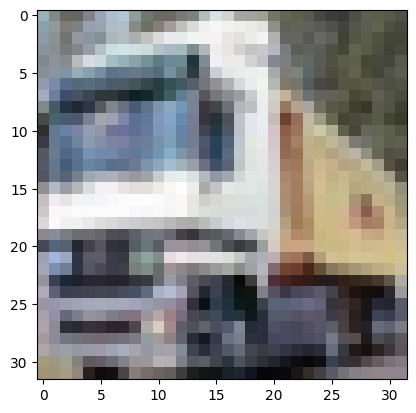

In [3]:
plt.imshow(x_train_raw[1])
y_train_raw[0]

In [4]:
#Convert the category label into onehot encoding
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train_raw, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test_raw, num_classes)

x_train = x_train_raw.astype('float32')/255
x_test = x_test_raw.astype('float32')/255
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

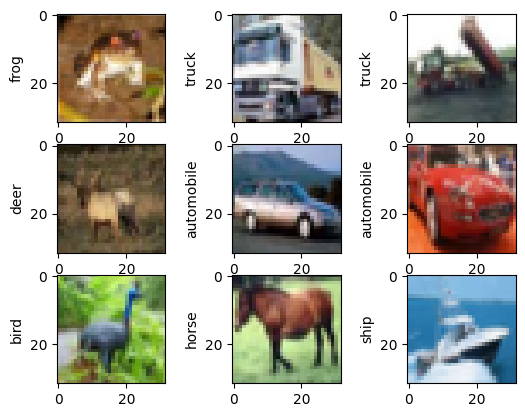

In [6]:
#Create a image tag list
category_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',
                 6:'frog',7:'horse',8:'ship',9:'truck'}
#Show the first 9 images and their labels
plt.figure()
for i in range(9):
    #create a figure with 9 subplots
    plt.subplot(3,3,i+1)
    #show an image
    plt.imshow(x_train_raw[i])
    #show the label
    plt.ylabel(category_dict[y_train_raw[i][0]])
plt.show()


# CNN model 1

In [7]:
# Update add some layers
model = Sequential()
model.add(Dense(128 ,input_dim=(3072)))
model.add(Activation('relu'))
model.add(Dense(num_classes))

#map the score of each class into probability
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(0.001) #--Update edit on learning rate here
loss=tf.keras.losses.categorical_crossentropy

model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X=x_train.reshape(50000,3072)
model.fit(X,y_train_onehot,epochs=50,batch_size=32) #--Update edit on epochs, batch size

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2744 - loss: 2.0086
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3618 - loss: 1.7759
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3806 - loss: 1.7317
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3987 - loss: 1.6896
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4017 - loss: 1.6661
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4126 - loss: 1.6392
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4181 - loss: 1.6319
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4218 - loss: 1.6211
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4225 - loss: 1.6141
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4310 - loss: 1.6049
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4272 - loss: 1.5956
Epoch 12/50
1563/1563 ━━━━━━━━

In [9]:
x_train.shape

(50000, 32, 32, 3)

# Another Updated CNN model
Adding these to increase the accuracy:

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same' ,input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))


model.add(Conv2D(64, (3, 3), padding='same' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))

model.add(Flatten())
model.add(Dense(128 ))
model.add(Activation('relu'))
model.add(Dense(num_classes))
#map the score of each class into probability
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(0.001)
loss=tf.keras.losses.categorical_crossentropy
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train_onehot,epochs=100,batch_size=100,validation_split=0.2)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3600 - loss: 1.7766 - val_accuracy: 0.5532 - val_loss: 1.2742
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5775 - loss: 1.1994 - val_accuracy: 0.6080 - val_loss: 1.1338
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6336 - loss: 1.0462 - val_accuracy: 0.6453 - val_loss: 1.0287
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6772 - loss: 0.9360 - val_accuracy: 0.6707 - val_loss: 0.9563
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7000 - loss: 0.8552 - val_accuracy: 0.6633 - val_loss: 0.9895
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7243 - loss: 0.7907 - val_accuracy: 0.6810 - val_loss: 0.9209
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7514 - loss: 0.7198 - val_accuracy: 0.6938 - val_loss: 0.9035
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7728 - loss: 0.6618 - val_accu

Text(0.5, 1.0, 'CIFAR10 Accurcy')

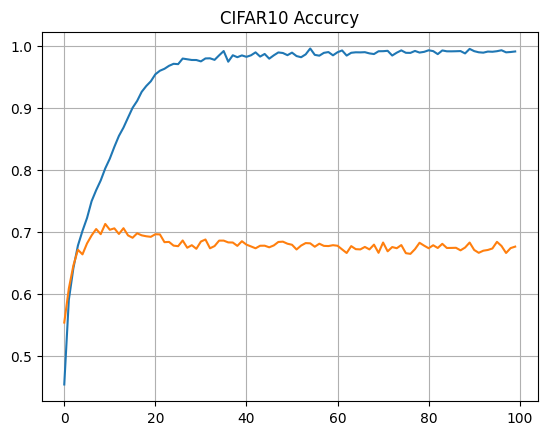

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.title("CIFAR10 Accurcy")

Text(0.5, 1.0, 'CIFAR10 Loss')

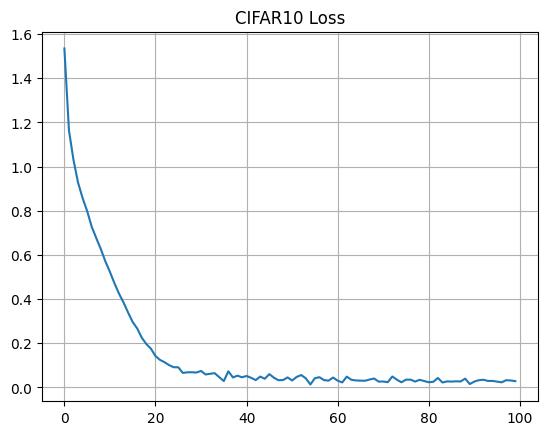

In [13]:
plt.plot(history.history["loss"])
plt.grid()
plt.title("CIFAR10 Loss")

In [14]:
model.save("my_model_v1.h5")

array([8], dtype=uint8)

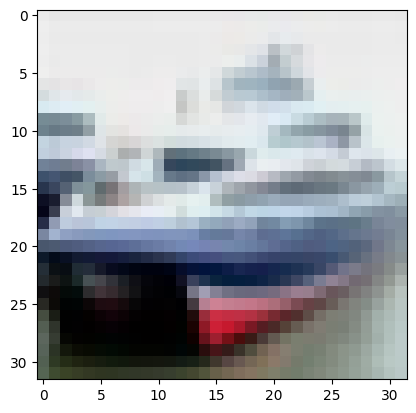

In [15]:
plt.imshow(x_test[1])
y_test_raw[1]

In [16]:
model.predict(x_test[1:2]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


array([8])

In [17]:
pred=model.predict(x_test[1:2]).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [18]:
category_dict[pred[0]]


'ship'

In [19]:
pred=model.predict(x_test)

model.evaluate(x_test,y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6697 - loss: 4.4574


[4.411311149597168, 0.6700000166893005]

In [20]:

gh_model = keras.models.load_model('/content/my_model_v1.h5')

In [21]:
gh_model.evaluate(x_test,y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6697 - loss: 4.4574


[4.411311149597168, 0.6700000166893005]

#Final Updated model - From scratch (Loading data, splitting and preprocessing)

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [27]:
# Load and preprocess the CIFAR-10 dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.cifar10.load_data()

# Normalize pixel values
x_train_raw = x_train_raw.astype('float32') / 255.0
x_test_raw = x_test_raw.astype('float32') / 255.0

# One-hot encode labels
num_classes = 10
y_train_onehot = to_categorical(y_train_raw, num_classes)
y_test_onehot = to_categorical(y_test_raw, num_classes)

# Split train/validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train_raw, y_train_onehot, test_size=0.2, random_state=42
)

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 358,218 (1.37 MB)

 Trainable params: 357,514 (1.36 MB)

 Non-trainable params: 704 (2.75 KB)

In [28]:
# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[reduce_lr, early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.3686 - loss: 1.8258 - val_accuracy: 0.2179 - val_loss: 2.9087 - learning_rate: 0.0010
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5501 - loss: 1.2679 - val_accuracy: 0.6209 - val_loss: 1.0736 - learning_rate: 0.0010
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.6042 - loss: 1.1182 - val_accuracy: 0.6264 - val_loss: 1.0460 - learning_rate: 0.0010
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.6385 - loss: 1.0246 - val_accuracy: 0.6740 - val_loss: 0.9058 - learning_rate: 0.0010
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.6576 - loss: 0.9741 - val_accuracy: 0.5959 - val_loss: 1.1864 - learning_rate: 0.0010
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.6731 - loss: 0.9339 - val_accuracy: 0.7165 - val_loss: 0.8061 - learning_rate: 0.0010
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.6